<a href="https://colab.research.google.com/github/Ibnuamrithaher/Deep-Learning/blob/main/13%20-%20Neural%20Network/Part%202%20-%20(Opsional)%20Neural%20Network%20with%20Scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install luwiji
!pip install scikit-learn

In [5]:
!unzip "data (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: data (1)/data/train/T-shirt or Top/3712.png  
  inflating: data (1)/data/train/T-shirt or Top/37126.png  
  inflating: data (1)/data/train/T-shirt or Top/37129.png  
  inflating: data (1)/data/train/T-shirt or Top/3713.png  
  inflating: data (1)/data/train/T-shirt or Top/37130.png  
  inflating: data (1)/data/train/T-shirt or Top/37133.png  
  inflating: data (1)/data/train/T-shirt or Top/37163.png  
  inflating: data (1)/data/train/T-shirt or Top/37173.png  
  inflating: data (1)/data/train/T-shirt or Top/37175.png  
  inflating: data (1)/data/train/T-shirt or Top/37177.png  
  inflating: data (1)/data/train/T-shirt or Top/37179.png  
  inflating: data (1)/data/train/T-shirt or Top/37185.png  
  inflating: data (1)/data/train/T-shirt or Top/37186.png  
  inflating: data (1)/data/train/T-shirt or Top/37190.png  
  inflating: data (1)/data/train/T-shirt or Top/37193.png  
  inflating: data (1)/data/train/T-shirt or Top/372

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
# from jcopml.save import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [7]:
from luwiji.neural_network import illustration

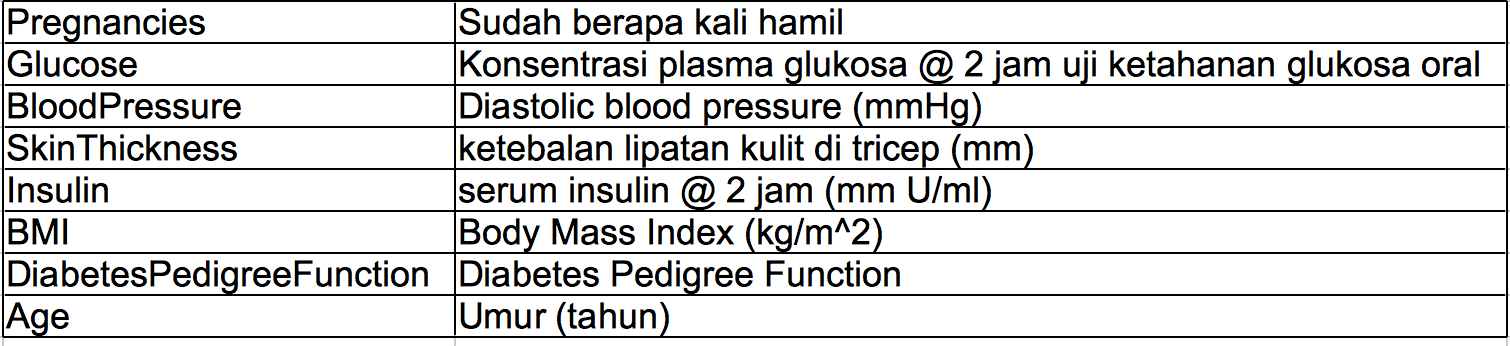

In [8]:
illustration.nomenklatur

## **Import Data**

modified from source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [9]:
df = pd.read_csv("data (1)/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


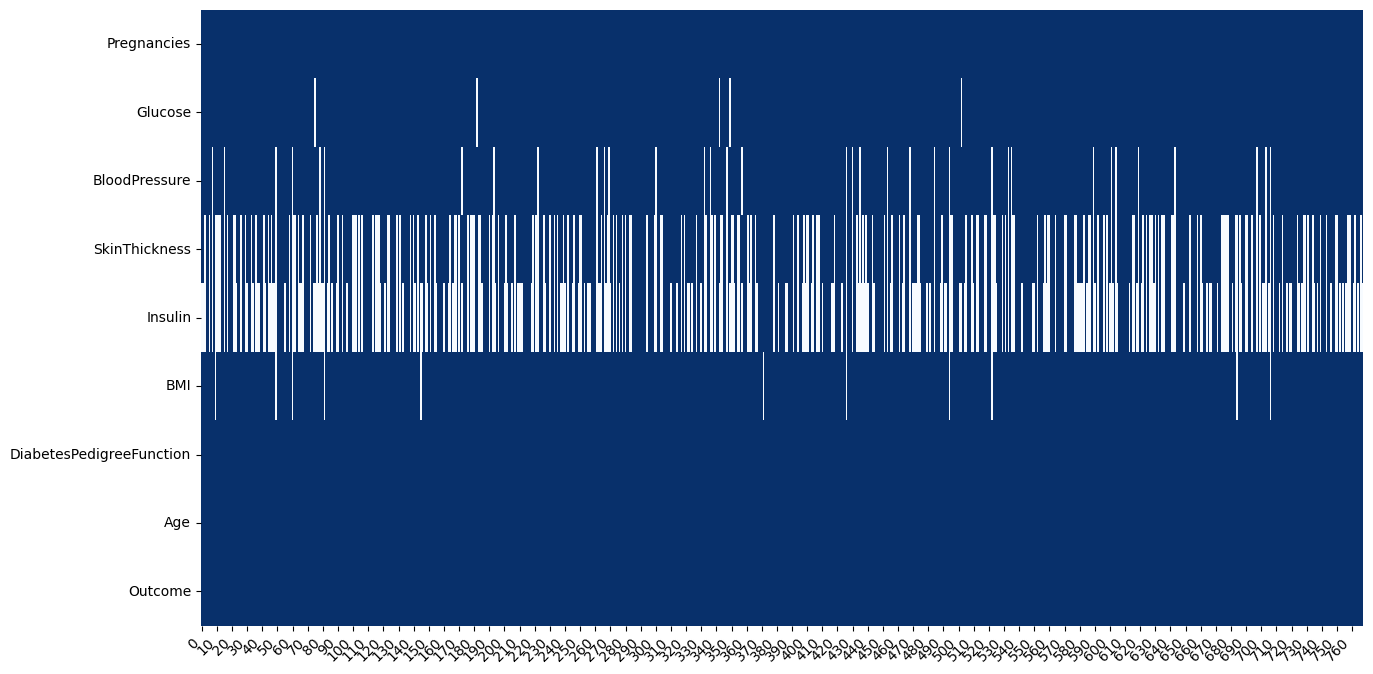

In [10]:

plot_missing_value(df)

In [11]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


## **Dataset Splitting**

In [12]:
X = df.drop(columns="Outcome")
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## **Training**

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'mlp__activation': 'relu', 'mlp__alpha': 0.0003, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.005}
0.7117263843648208 0.7247728359636537 0.7012987012987013


## Feature Importance

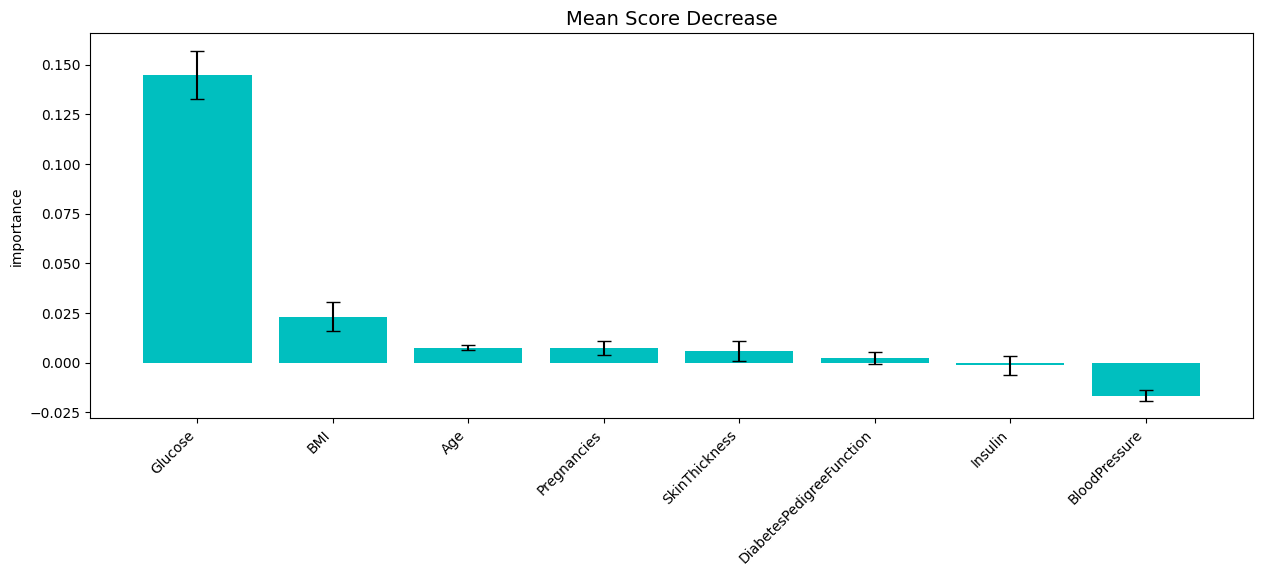

In [16]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, transform='box-cox'), ["Glucose", "BMI", "SkinThickness"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


ValueError: 
All the 324 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 730, in fit_transform
    return last_step.fit_transform(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py", line 3320, in fit_transform
    return self._fit(X, y, force_transform=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py", line 3352, in _fit
    self.lambdas_[i] = optim_function(col)
                       ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py", line 3497, in _box_cox_optimize
    _, lmbda = stats.boxcox(x[~mask], lmbda=None)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py", line 1114, in boxcox
    raise ValueError("Data must not be constant.")
ValueError: Data must not be constant.
